In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [6]:
dcm1 = pydicom.dcmread('dicom_00023075_033.dcm')
dcm2 = pydicom.dcmread('dicom_00029579_005.dcm')
dcm3 =  pydicom.dcmread('dicom_00013659_019.dcm')

<IPython.core.display.Javascript object>


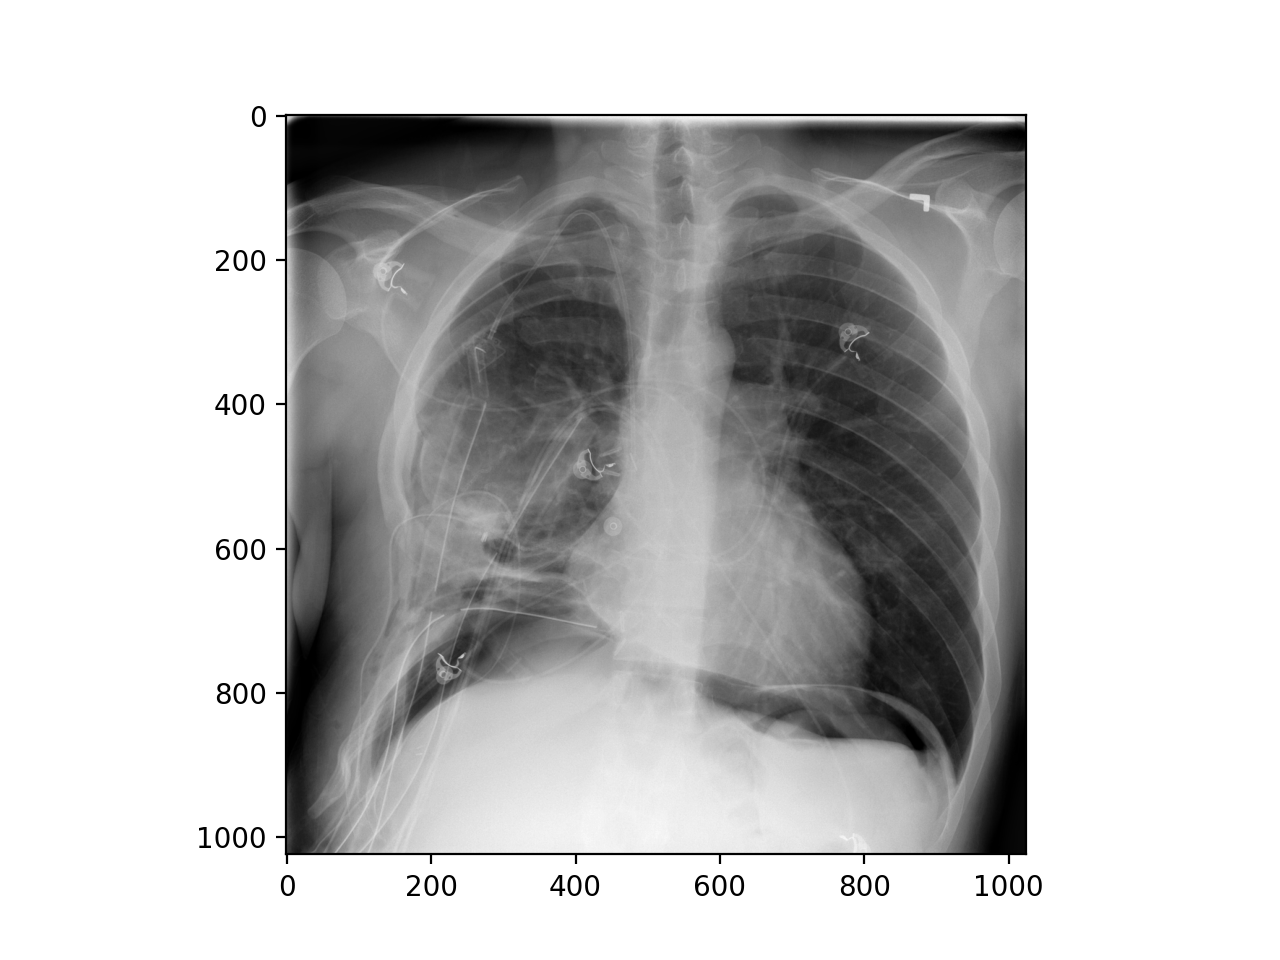

In [14]:
plt.imshow(dcm1.pixel_array,cmap='gray')

<IPython.core.display.Javascript object>


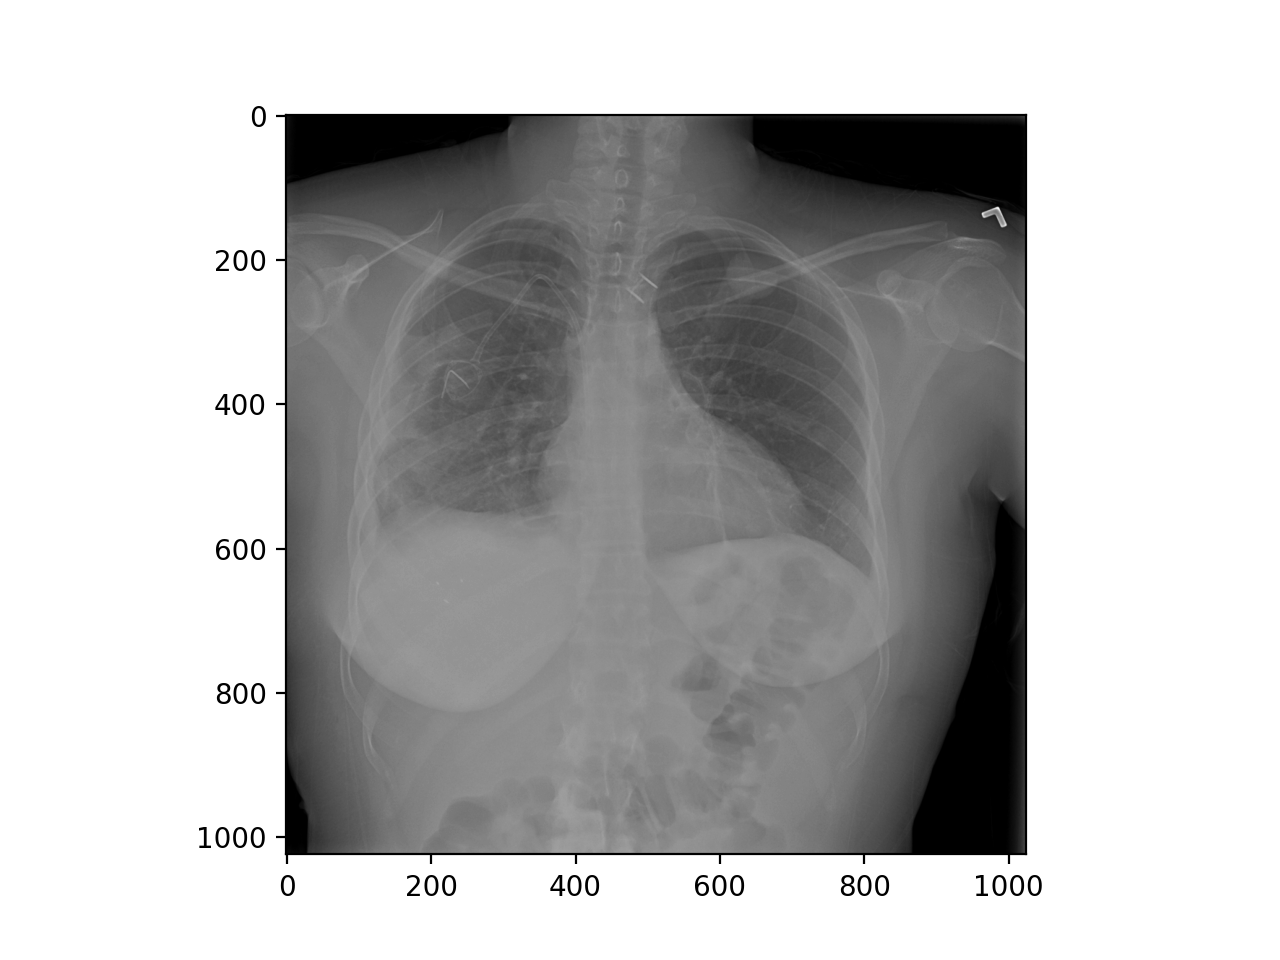

In [15]:
plt.imshow(dcm2.pixel_array,cmap='gray')

<IPython.core.display.Javascript object>


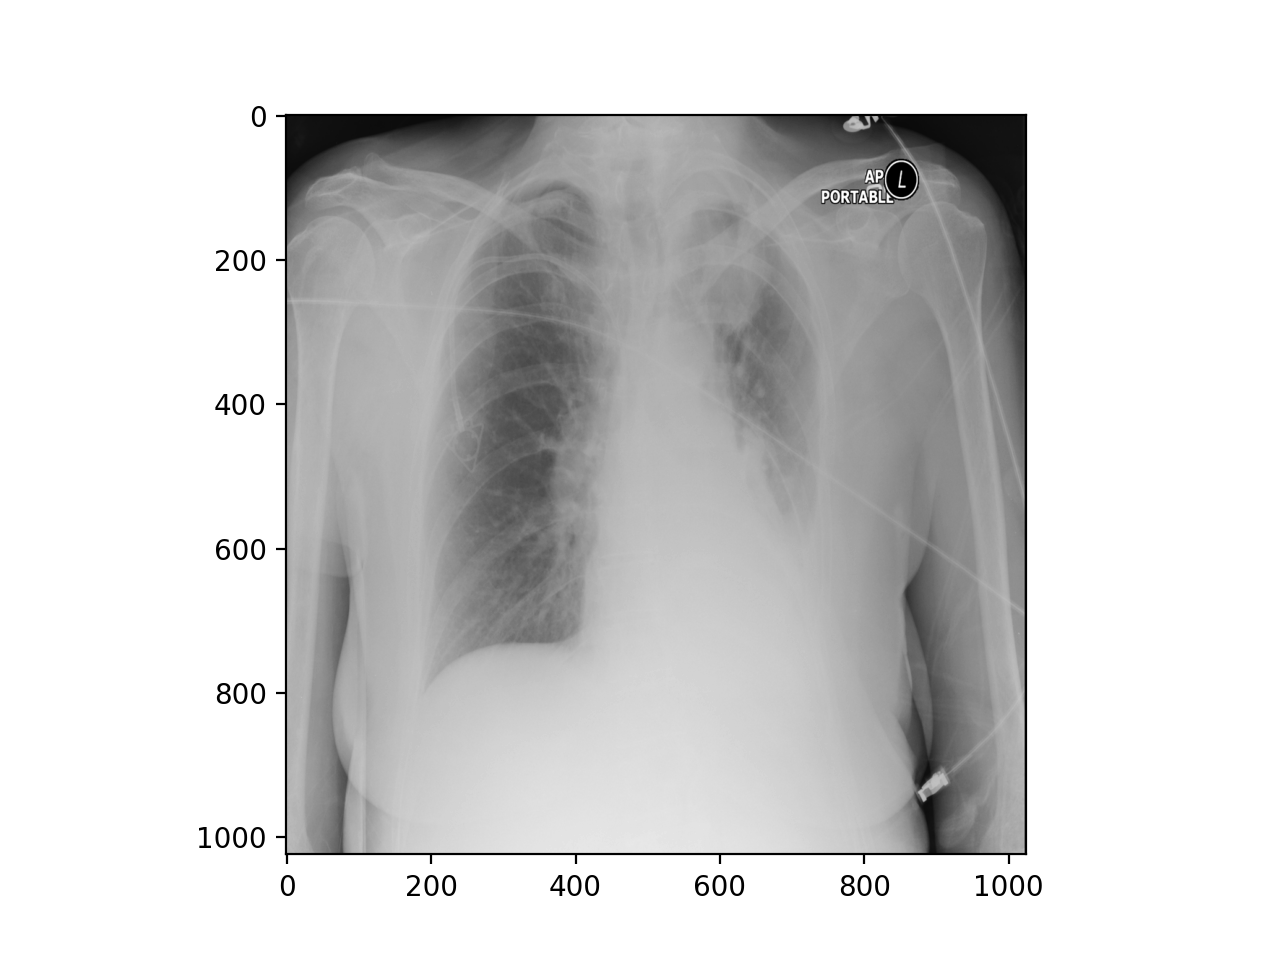

In [16]:
plt.imshow(dcm3.pixel_array,cmap='gray')

<IPython.core.display.Javascript object>


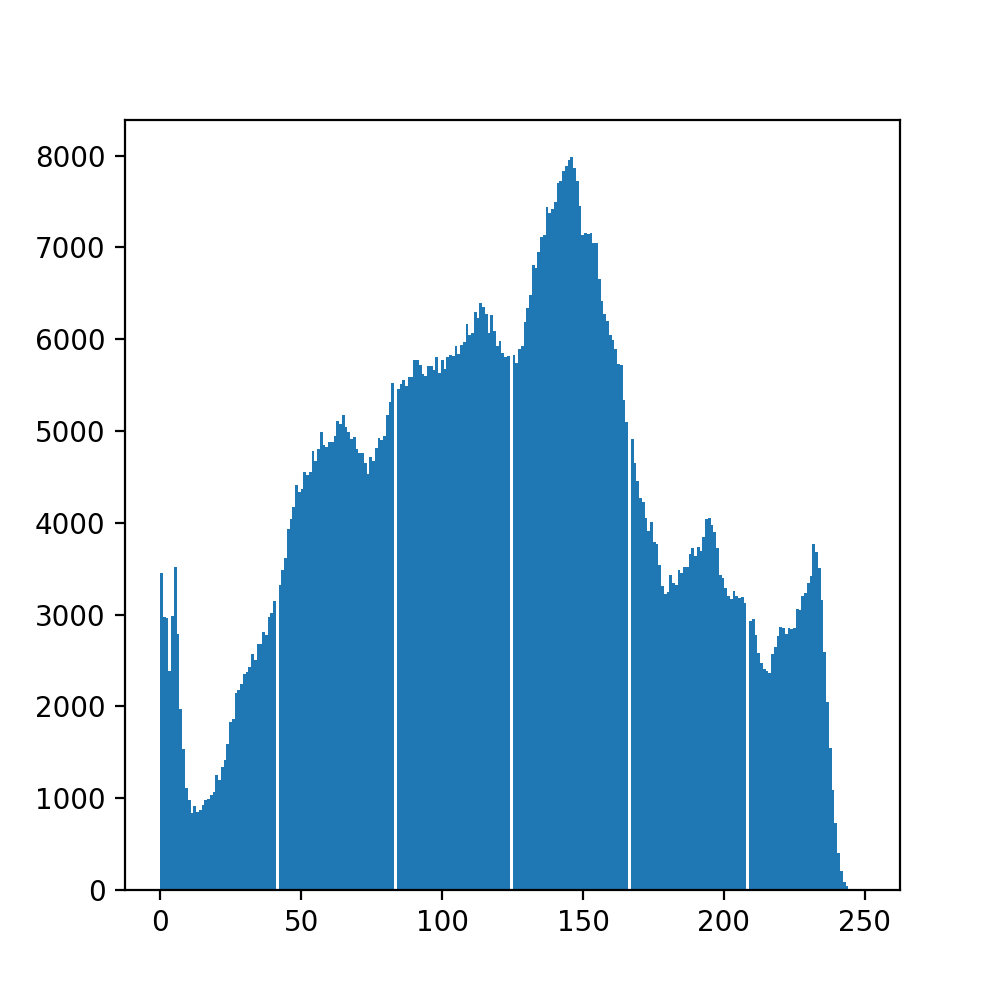

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [19]:
plt.figure(figsize=(5,5))
plt.hist(dcm1.pixel_array.ravel(), bins = 256)

<IPython.core.display.Javascript object>


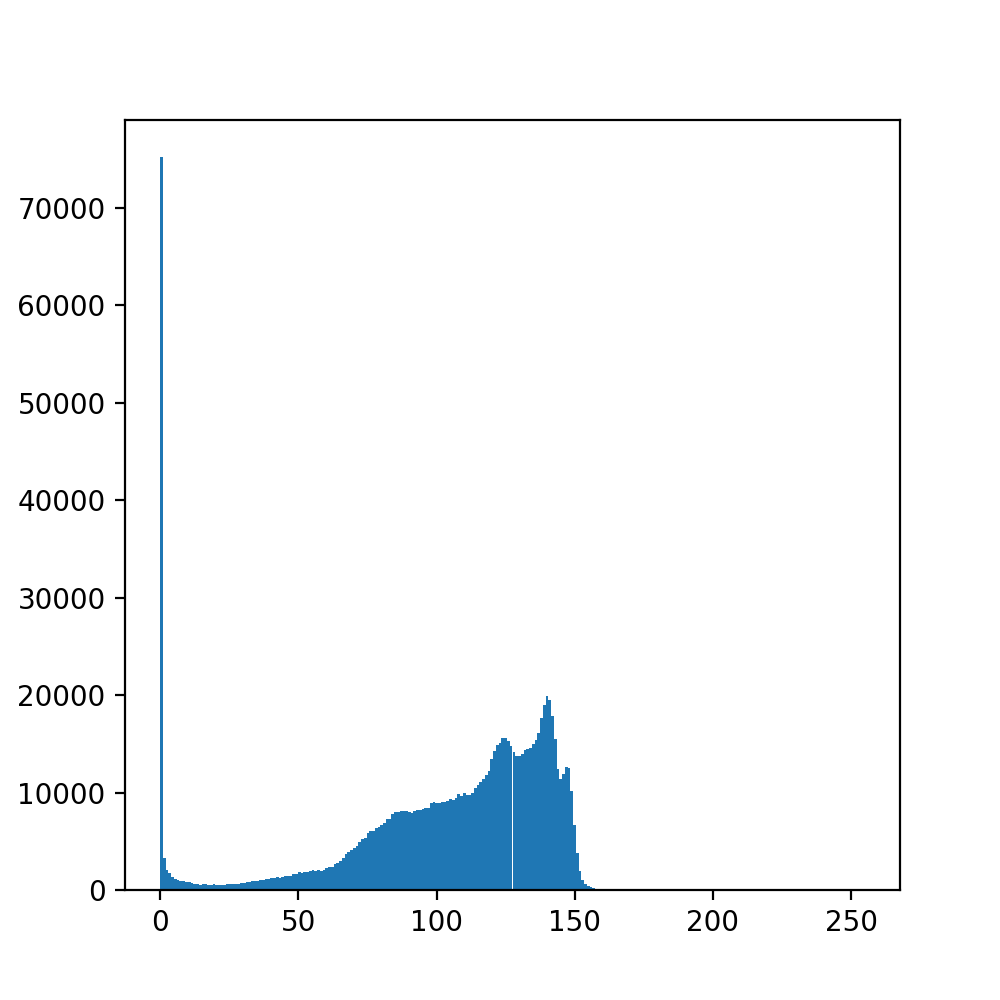

(array([7.5257e+04, 3.2400e+03, 2.0070e+03, 1.6990e+03, 1.3230e+03,
        1.1500e+03, 1.0230e+03, 8.8300e+02, 8.8200e+02, 8.3800e+02,
        7.9000e+02, 6.8100e+02, 6.6600e+02, 6.4200e+02, 5.5100e+02,
        5.8200e+02, 5.9100e+02, 5.2500e+02, 5.5200e+02, 5.7700e+02,
        5.2600e+02, 5.6300e+02, 5.5100e+02, 5.4700e+02, 5.9500e+02,
        5.9300e+02, 6.0300e+02, 6.3800e+02, 6.5600e+02, 7.2000e+02,
        7.1500e+02, 7.8000e+02, 8.3400e+02, 9.1000e+02, 9.7000e+02,
        9.4900e+02, 1.0210e+03, 1.0620e+03, 1.1390e+03, 1.1460e+03,
        1.2310e+03, 1.2570e+03, 1.3500e+03, 1.2810e+03, 1.3580e+03,
        1.4710e+03, 1.4820e+03, 1.4660e+03, 1.5910e+03, 1.6740e+03,
        1.8090e+03, 1.7390e+03, 1.8070e+03, 1.8360e+03, 1.9610e+03,
        2.0430e+03, 1.9570e+03, 2.0190e+03, 1.9730e+03, 2.0210e+03,
        2.2260e+03, 2.4030e+03, 2.4010e+03, 2.6180e+03, 2.8080e+03,
        2.9310e+03, 3.3110e+03, 3.6500e+03, 3.8790e+03, 4.1520e+03,
        4.2900e+03, 4.5400e+03, 4.8760e+03, 5.25

In [20]:
plt.figure(figsize=(5,5))
plt.hist(dcm2.pixel_array.ravel(), bins = 256)

<IPython.core.display.Javascript object>


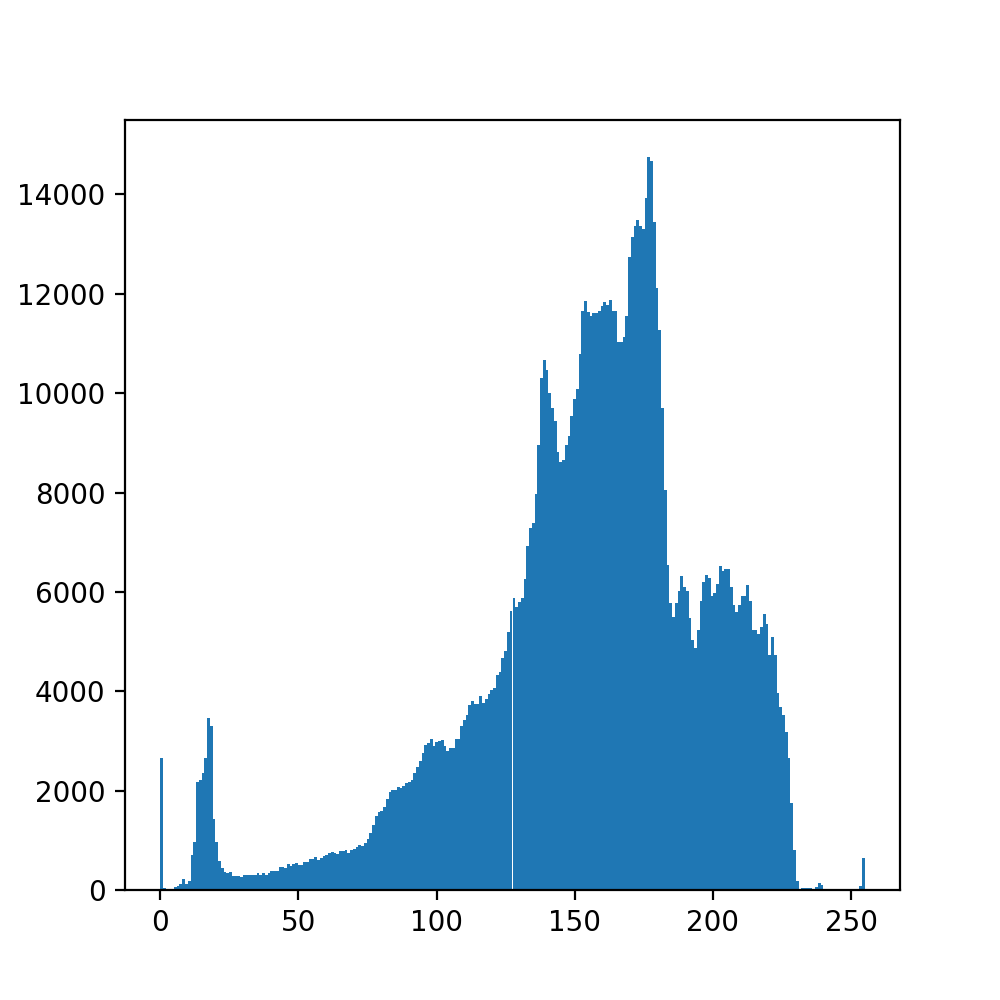

(array([2.6510e+03, 3.9000e+01, 1.9000e+01, 2.6000e+01, 1.9000e+01,
        7.0000e+01, 8.7000e+01, 1.2400e+02, 2.2100e+02, 1.1200e+02,
        1.8000e+02, 7.1200e+02, 9.5900e+02, 2.1810e+03, 2.2080e+03,
        2.3530e+03, 2.6470e+03, 3.4630e+03, 3.3090e+03, 1.4310e+03,
        9.7600e+02, 5.9000e+02, 4.4700e+02, 3.5900e+02, 3.4700e+02,
        3.5800e+02, 2.8100e+02, 2.9100e+02, 2.8700e+02, 2.5400e+02,
        2.9600e+02, 3.0000e+02, 3.0500e+02, 2.9800e+02, 2.9500e+02,
        3.4600e+02, 3.0700e+02, 3.4300e+02, 3.0400e+02, 3.4700e+02,
        3.8900e+02, 3.8900e+02, 3.7400e+02, 4.6300e+02, 4.6300e+02,
        4.5100e+02, 5.1500e+02, 4.8500e+02, 5.1800e+02, 5.4600e+02,
        4.9900e+02, 5.0200e+02, 5.7300e+02, 5.5600e+02, 6.2100e+02,
        6.2400e+02, 6.5500e+02, 6.0600e+02, 6.3500e+02, 6.8200e+02,
        7.0600e+02, 7.5000e+02, 7.5800e+02, 7.5000e+02, 7.3300e+02,
        7.7700e+02, 7.8600e+02, 8.0300e+02, 7.5200e+02, 8.0800e+02,
        8.3000e+02, 8.6300e+02, 8.9800e+02, 8.80

In [21]:
plt.figure(figsize=(5,5))
plt.hist(dcm3.pixel_array.ravel(), bins = 256)

<IPython.core.display.Javascript object>


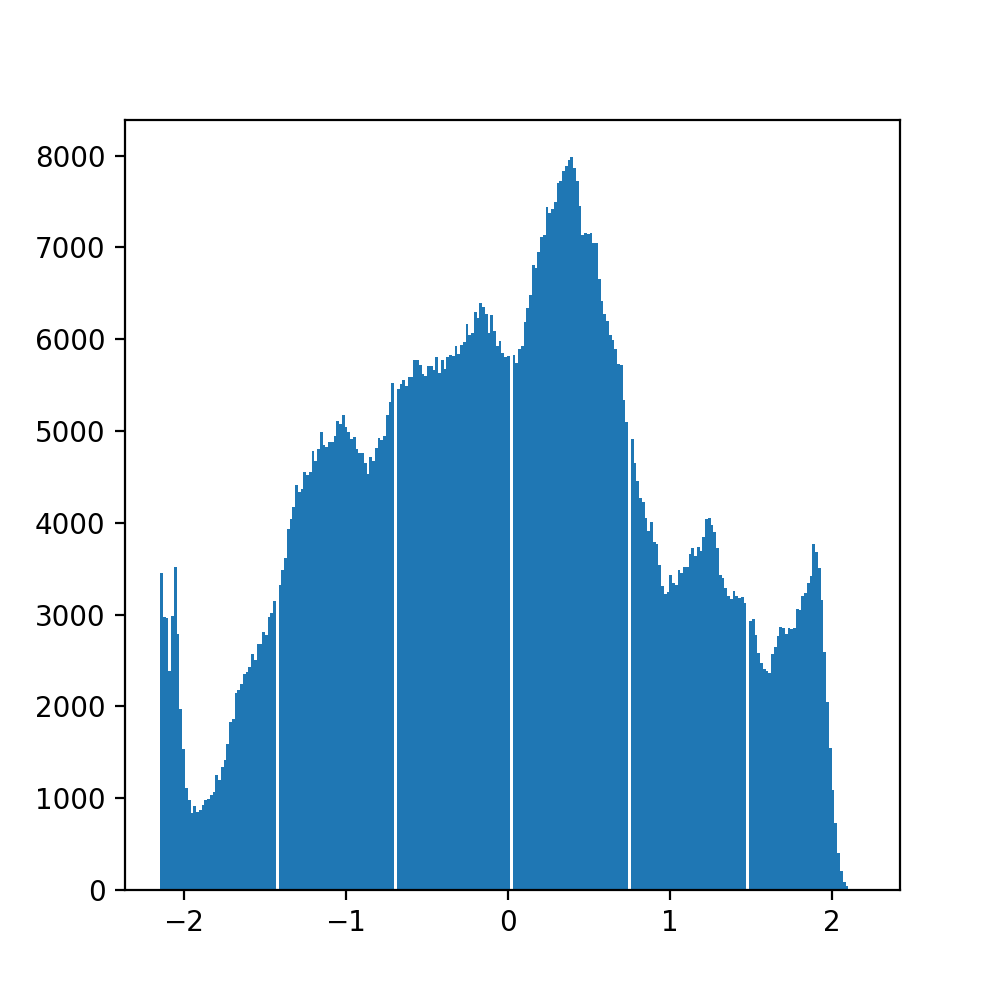

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [23]:
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)

In [26]:
mean_intensity = np.mean(dcm1.pixel_array)
mean_intensity
std_intensity = np.std(dcm1.pixel_array)
std_intensity
new_img = dcm1.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

<IPython.core.display.Javascript object>


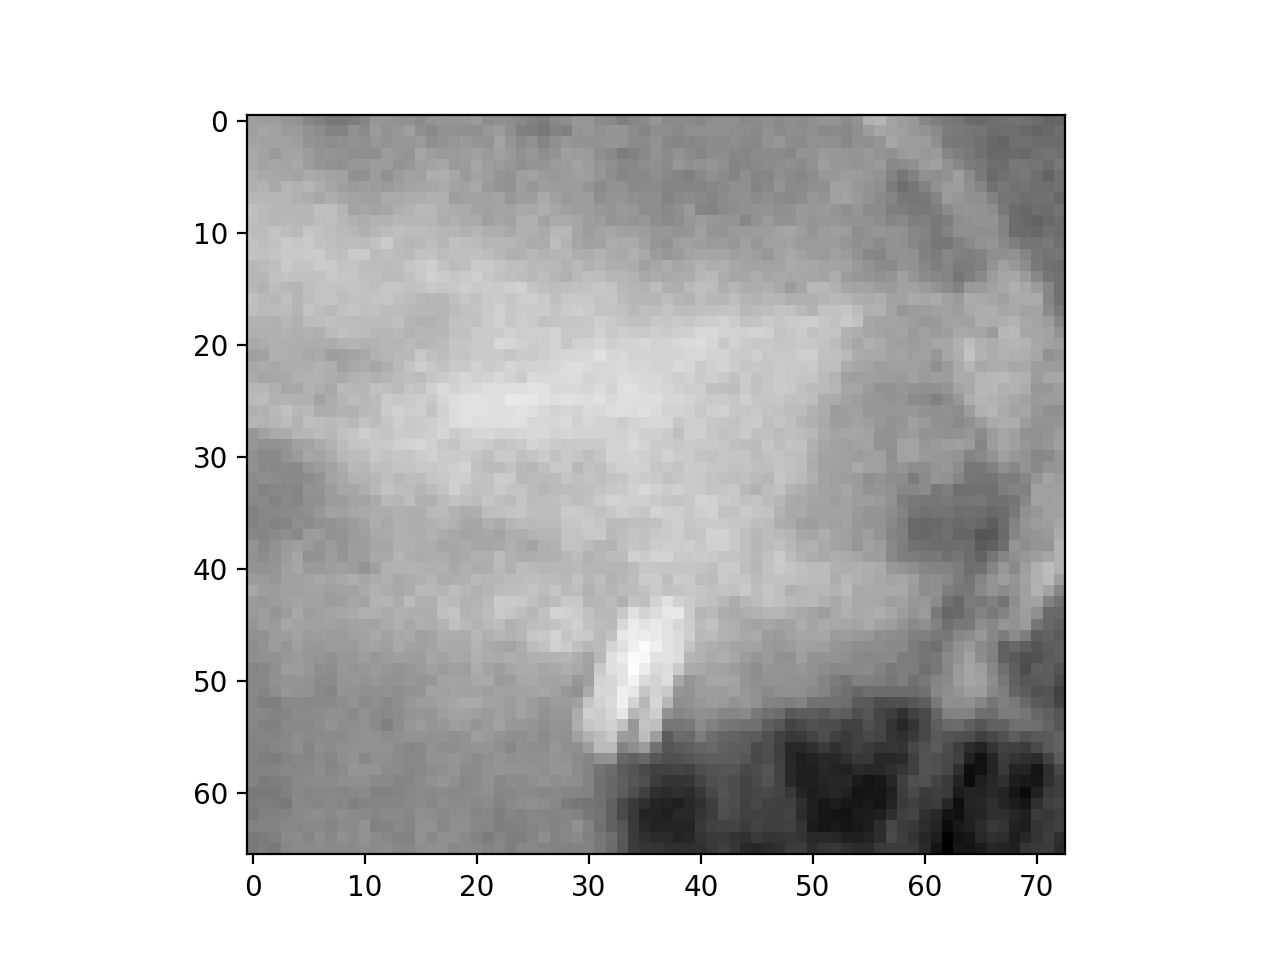

<IPython.core.display.Javascript object>


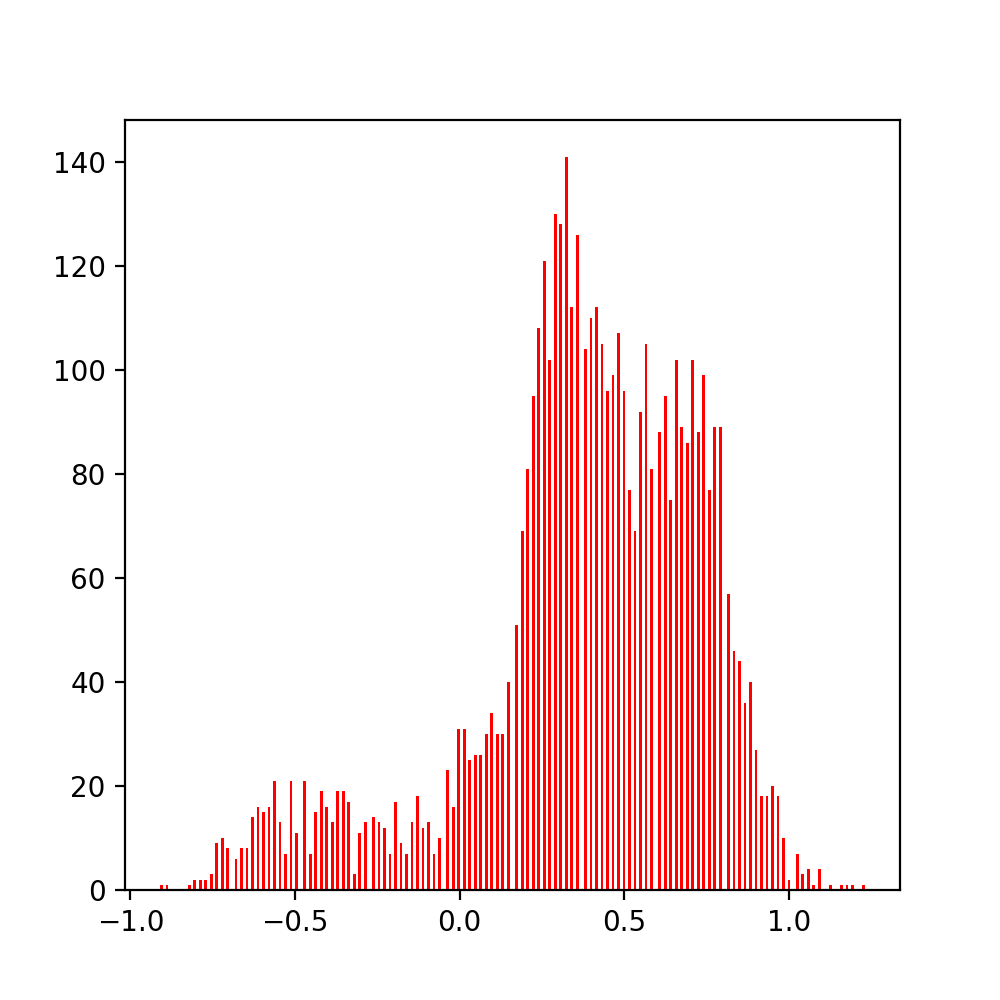

In [29]:
bbox
plt.imshow(dcm1.pixel_array[535:(535+66),240:(240+73)],cmap='gray')
plt.figure(figsize=(5,5))
plt.hist(new_img[535:(535+66),240:(240+73)].ravel(), bins = 256,color='red')
plt.show()